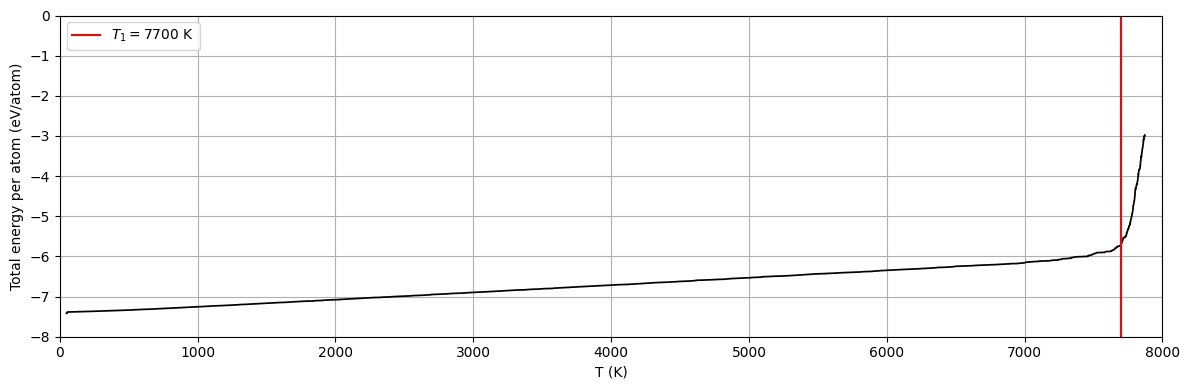

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

# Load and prepare data
data = np.loadtxt("C:/GitHub/SHARED_VM/MAC/slow_melting/graphene/output/t_e.txt")
temp = data[:,1]
energy = data[:,2] / 1008
indices = np.argsort(temp)
temp = temp[indices]
energy = energy[indices]

# Smooth energy with rolling average
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    return np.convolve(y, box, mode='same')

box_pts = 200
smoothed_energy = smooth(energy, box_pts)

# Trim edge artifacts
half_window = box_pts // 2
temp_trimmed = temp[half_window:-half_window]
energy_trimmed = smoothed_energy[half_window:-half_window]

# Remove trailing spike (optional)
cutoff = np.quantile(temp_trimmed, 0.995)
mask = temp_trimmed < cutoff

# Plot
plt.figure(figsize=(12, 4))
plt.plot(temp_trimmed[mask], energy_trimmed[mask], color="black", linewidth=1.25)
plt.axvline(7700, 0, color="red", label=r"$T_1=7700$ K")
plt.xlabel("T (K)")
plt.ylabel("Total energy per atom (eV/atom)")
plt.ylim((-8,0))
plt.xlim((0,8000))
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()
